In [1]:
import matplotlib.pyplot as plt
import numpy as np

Check event generation

In [2]:
from generator import Response

In [3]:
from generator import OscPars

In [4]:
from generator import Generator

# Histograms

In [5]:
bin_edges = np.logspace(1., 2., 26)

Re-weighting to a different set of oscillation parameters

In [6]:
response = Response(1.1, 0.1)

In [7]:
gen = Generator(int(1e5), response)


h0 = gen.get_histogram(bin_edges)
hist0, hist0_unc = h0['hist'], h0['hist_unc']

gen.reweight_oscillation(OscPars(0.1, 0.1))

h = gen.get_histogram(bin_edges)
hist, hist_unc = h['hist'], h['hist_unc']
gen2 = Generator(int(1e5), response, OscPars(0.1, 0.1))
h2 = gen2.get_histogram(bin_edges)
hist2, hist2_unc = h2['hist'], h2['hist_unc']


Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0


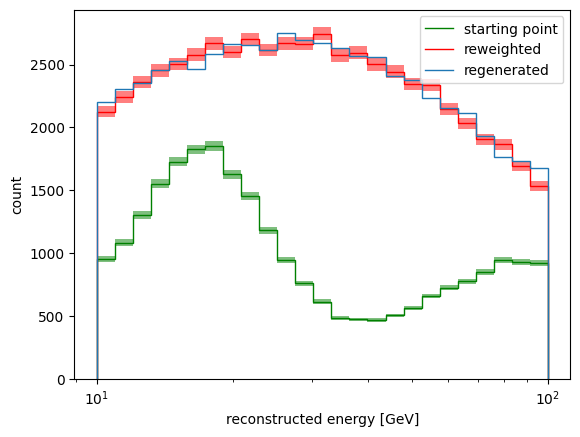

In [8]:
# first and last bin are overflow bins in hist

plt.stairs(hist0[1:-1], bin_edges, label='starting point', color='g')
plt.stairs(hist0[1:-1]+hist0_unc[1:-1], bin_edges,
    baseline=hist0[1:-1]-hist0_unc[1:-1], fill=True,
    color='g', alpha=0.5)

plt.stairs(hist[1:-1], bin_edges, label='reweighted', color='r')
plt.stairs(hist[1:-1]+hist_unc[1:-1], bin_edges,
    baseline=hist[1:-1]-hist_unc[1:-1], fill=True,
    color='r', alpha=0.5)
plt.stairs(hist2[1:-1], bin_edges, label='regenerated')
plt.xscale('log')
plt.xlabel('reconstructed energy [GeV]')
plt.ylabel('count')

plt.legend()

Re-weighting to a different detector response

In [9]:
response = Response(1.1, 0.1)
response2 = Response(0.9, 0.05)


gen = Generator(int(1e5), response)
h0 = gen.get_histogram(bin_edges)
hist0, hist0_unc = h0['hist'], h0['hist_unc']

gen.reweight_detector_response(response2)

h = gen.get_histogram(bin_edges)
hist, hist_unc = h['hist'], h['hist_unc']


response2 = Response(0.9, 0.05)
gen2 = Generator(int(1e5), response2)
h2 = gen2.get_histogram(bin_edges)
hist2, hist2_unc = h2['hist'], h2['hist_unc']

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0


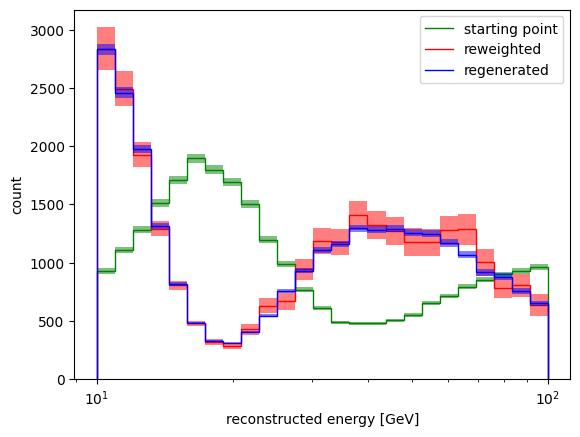

In [10]:
# first and last bin are overflow bins in hist
plt.stairs(hist0[1:-1], bin_edges, label='starting point', color='g')
plt.stairs(hist0[1:-1]+hist0_unc[1:-1], bin_edges,
    baseline=hist0[1:-1]-hist0_unc[1:-1], fill=True,
    color='g', alpha=0.5)

plt.stairs(hist[1:-1], bin_edges, label='reweighted', color='r')
plt.stairs(hist[1:-1]+hist_unc[1:-1], bin_edges,
    baseline=hist[1:-1]-hist_unc[1:-1], fill=True,
    color='r', alpha=0.5)

plt.stairs(hist2[1:-1], bin_edges, label='regenerated', color='b')
plt.stairs(hist2[1:-1]+hist2_unc[1:-1], bin_edges,
    baseline=hist2[1:-1]-hist2_unc[1:-1], fill=True,
    color='b', alpha=0.5)
plt.xscale('log')
plt.xlabel('reconstructed energy [GeV]')
plt.ylabel('count')

plt.legend()